## MAE290B, Homework Assigment 3
## Cesar B. Rocha (<crocha@ucsd.edu>)
### Winter 2015

In [18]:
from __future__ import division
import numpy as np
from numpy import sqrt,pi,cos,sin
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
kdx = np.linspace(1.e-14,pi,100)
kprimedx2 =  4*sin(kdx/2)**2

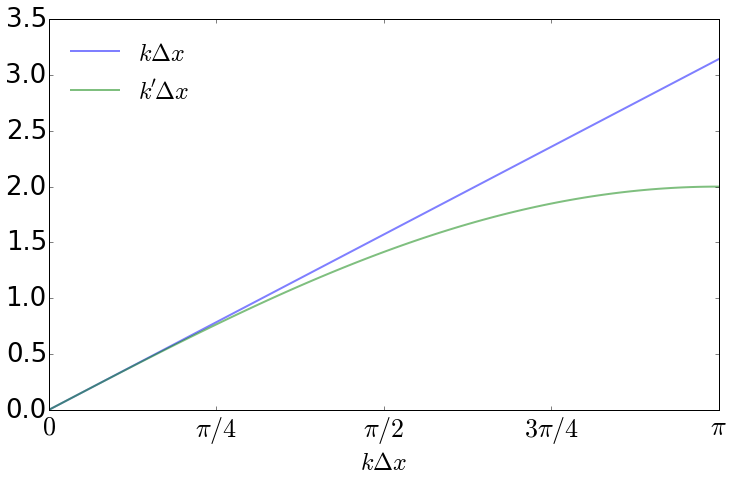

In [34]:
fig = plt.figure(figsize=(12,7))
plt.plot(kdx,kdx,linewidth=2,alpha=.5,label=r"$k\Delta x$")
plt.plot(kdx,sqrt(kprimedx2),linewidth=2,alpha=.5,label=r"$k'\Delta x$")
plt.xticks([0,pi/4,pi/2,3*pi/4,pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',\
                                    r'$3\pi/4$',r'$\pi$'])
plt.xlim(0,pi)
plt.xlabel(r'$k\Delta x$')
plt.legend(loc=2)
plt.savefig('modified_wavenumber_diff')

In [37]:
(2-pi)/pi

-0.3633802276324186